# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [16]:
# Dependencies and Setup
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
api_key = "0eb0221e91967c1f0d90ac355717c482"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:

# Define base API endpoint
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log each city being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Build query parameters
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"
    }

    # Make API call and store the result
    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        city_weather = {
            "City": city,
            "Lat": data["coord"]["lat"],
            "Lng": data["coord"]["lon"],
            "Max Temp": data["main"]["temp_max"],
            "Humidity": data["main"]["humidity"],
            "Cloudiness": data["clouds"]["all"],
            "Wind Speed": data["wind"]["speed"],
            "Country": data["sys"]["country"],
            "Date": data["dt"]
        }

        city_data.append(city_weather)

    except KeyError:
        print("City not found. Skipping...")
    except Exception as e:
        print(f"An error occurred: {e}")

    record_count += 1


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | mitu
Processing Record 3 of Set 1 | quelimane
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | hongwon
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | priargunsk
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | quthing
Processing Record 18 of Set 1 | tsiombe
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | nema
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | longyearbyen
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,27.63,30,0,3.04,ZA,1744984186
1,mitu,1.1983,-70.1733,26.15,92,89,0.55,CO,1744983939
2,quelimane,-17.8786,36.8883,26.97,83,75,2.06,MZ,1744984186
3,edinburgh of the seven seas,-37.0676,-12.3116,15.02,65,99,5.45,SH,1744984186
4,waitangi,-43.9535,-176.5597,14.34,95,100,2.24,NZ,1744984187


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/vikto/OneDrive/Desktop/Refresh_topics/output_data/cities.csv", index_label="City_ID")


In [8]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/vikto/OneDrive/Desktop/Refresh_topics/output_data/cities.csv")


# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bredasdorp,-34.5322,20.0403,27.63,30,0,3.04,ZA,1744984186
1,1,mitu,1.1983,-70.1733,26.15,92,89,0.55,CO,1744983939
2,2,quelimane,-17.8786,36.8883,26.97,83,75,2.06,MZ,1744984186
3,3,edinburgh of the seven seas,-37.0676,-12.3116,15.02,65,99,5.45,SH,1744984186
4,4,waitangi,-43.9535,-176.5597,14.34,95,100,2.24,NZ,1744984187


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

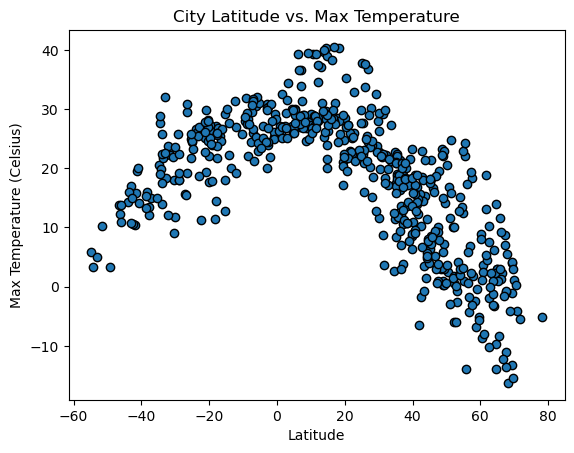

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
try:
    plt.savefig("C:/Users/vikto/OneDrive/Desktop/Refresh_topics/output_data/Fig1.png")
except Exception as e:
    print("Oops, try another way:", e)
# Show plot
plt.show()


#### Latitude Vs. Humidity

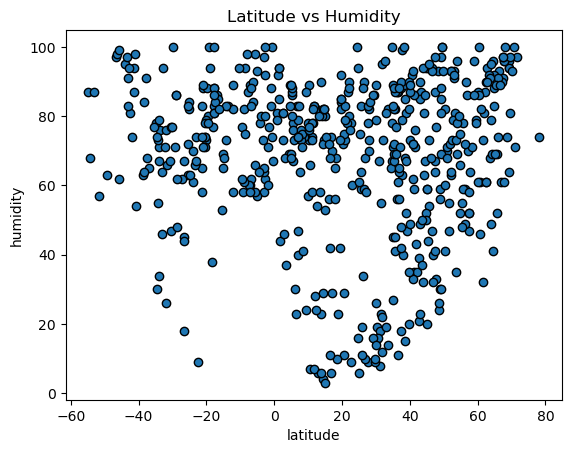

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("latitude")
plt.ylabel("humidity")

# Save the figure
plt.savefig("C:/Users/vikto/OneDrive/Desktop/Refresh_topics/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

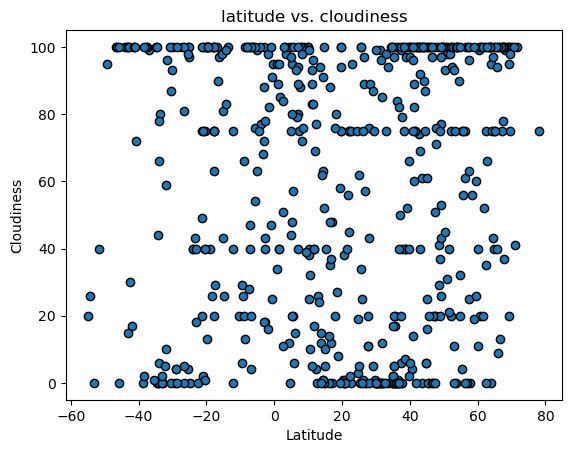

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black")

# Incorporate the other graph properties
plt.title("latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("C:/Users/vikto/OneDrive/Desktop/Refresh_topics/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

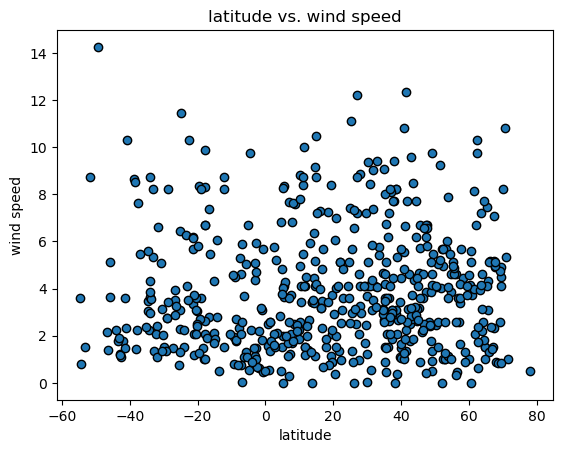

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black")
# Incorporate the other graph properties
plt.title("latitude vs. wind speed")
plt.xlabel("latitude")
plt.ylabel("wind speed")
# Save the figure
plt.savefig("C:/Users/vikto/OneDrive/Desktop/Refresh_topics/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
from scipy import stats

# Filter for Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Run linear regression: Latitude vs. Max Temp (or any other pair)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Display the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (Correlation): {rvalue}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")


Slope: -0.5350686195711389
Intercept: 35.45069967272516
R-value (Correlation): -0.8364178557257991
P-value: 1.6566599610113466e-106
Standard Error: 0.017531129266751624


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=(city_data_df.loc(city_data_df["Lat"]>=0))


# Display sample data
northern_hemi_df.head()

TypeError: unhashable type: 'Series'

In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,mitu,1.1983,-70.1733,26.15,92,89,0.55,CO,1744983939
5,5,kingston,17.9970,-76.7936,28.42,65,20,1.54,JM,1744983691
9,9,bethel,41.3712,-73.4140,13.97,35,89,1.34,US,1744984188
11,11,bikenibeu village,1.3673,173.1241,26.98,94,40,2.57,KI,1744984188
12,12,hongwon,40.0253,127.9558,10.87,73,100,1.48,KP,1744984188


###  Temperature vs. Latitude Linear Regression Plot

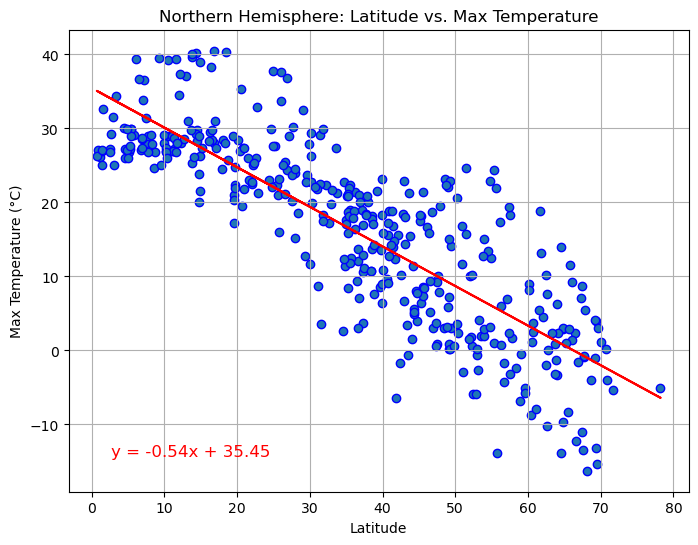

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Calculate regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data and regression line
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, edgecolors="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min() + 2, y_values.min() + 2), fontsize=12, color="red")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.show()

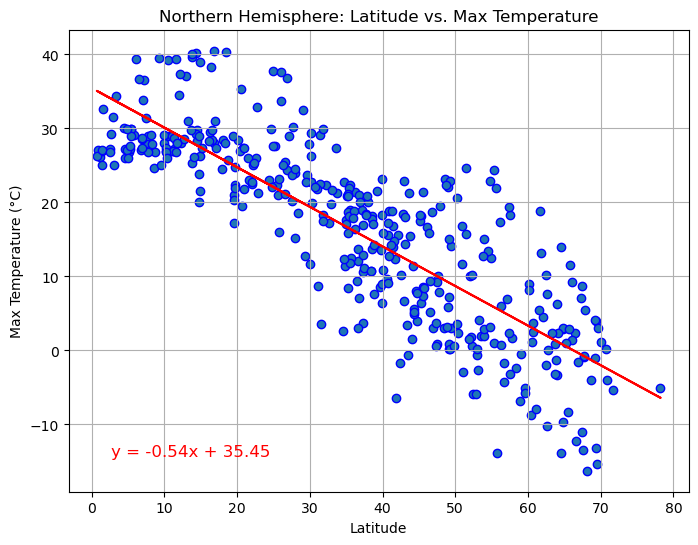

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Calculate regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data and regression line
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, edgecolors="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min() + 2, y_values.min() + 2), fontsize=12, color="red")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

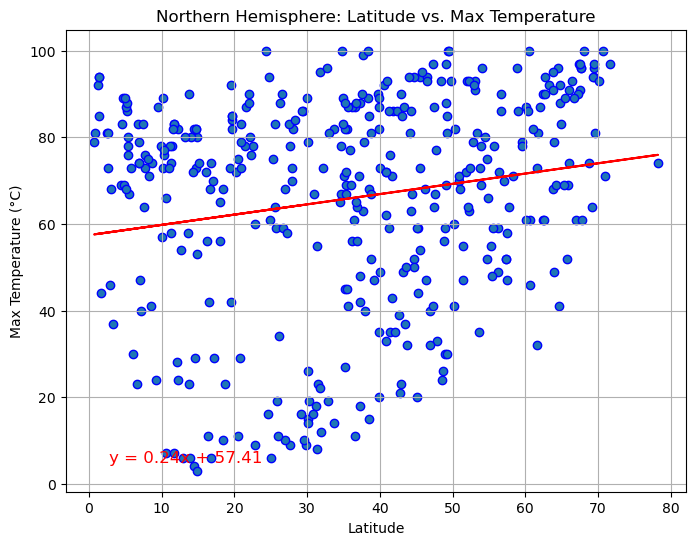

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Calculate regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data and regression line
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, edgecolors="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min() + 2, y_values.min() + 2), fontsize=12, color="red")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.show()

The r^2-value is: 0.00014367159540169783


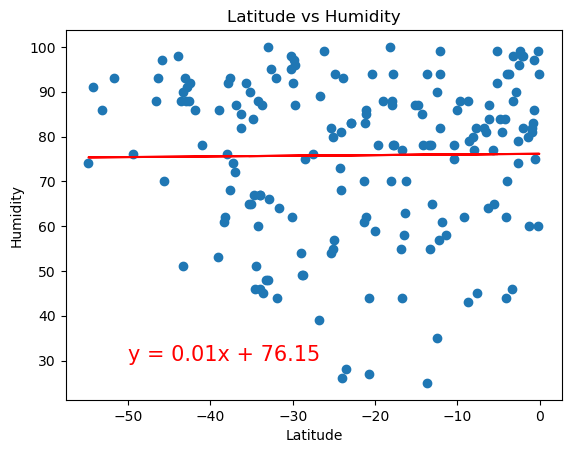

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


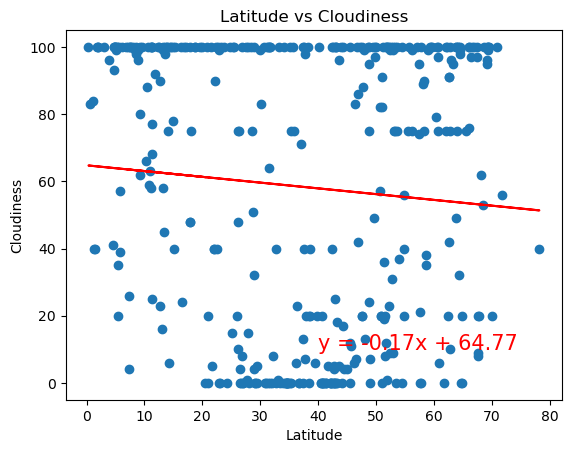

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


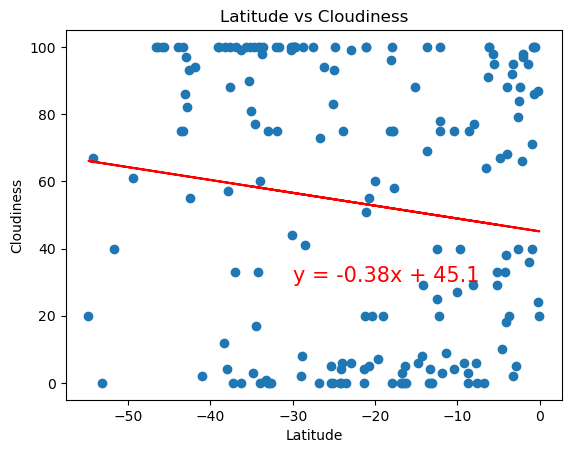

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


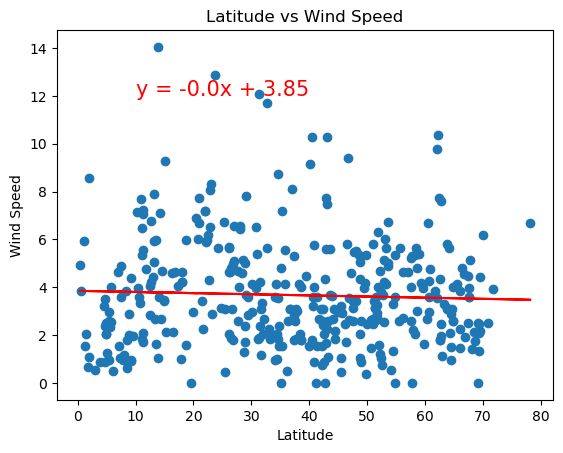

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


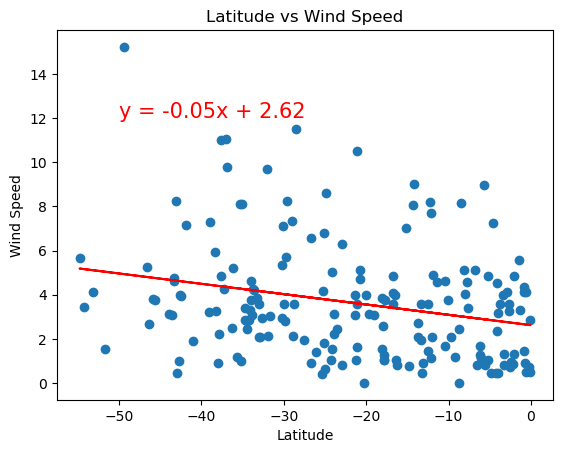

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE